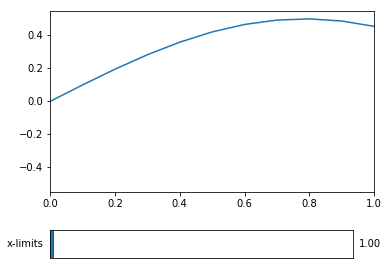

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Create some random data
x = np.linspace(0,100,1000)
y = np.sin(x) * np.cos(x)

left, bottom, width, height = 0.15, 0.02, 0.7, 0.10

fig, ax = plt.subplots()

plt.subplots_adjust(left=left, bottom=0.25) # Make space for the slider

ax.plot(x,y)

# Set the starting x limits
xlims = [0, 1]
ax.set_xlim(*xlims)

# Create a plt.axes object to hold the slider
slider_ax = plt.axes([left, bottom, width, height])
# Add a slider to the plt.axes object
slider = Slider(slider_ax, 'x-limits', valmin=0.0, valmax=100.0, valinit=xlims[1])

# Define a function to run whenever the slider changes its value.
def update(val):
    xlims[1] = val
    ax.set_xlim(*xlims)

    fig.canvas.draw_idle()

# Register the function update to run when the slider changes value
slider.on_changed(update)

plt.show()

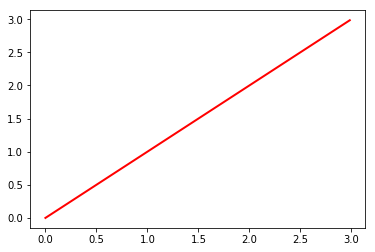

interactive(children=(FloatSlider(value=2.0, description='f', max=5.0), Output()), _dom_classes=('widget-interact',))

<function __main__.func>

In [5]:
#from notebook import *
from ipywidgets import interact
#from IPython.html.widgets import *
import numpy as np
import matplotlib.pyplot as plt
p=np.arange(0,np.pi,0.05*np.pi)
fig, ax = plt.subplots()
l, = plt.plot(p,p, lw=2, color='red')
#t=np.arange(0,1,0.1)
def func(f):
    l.set_ydata(np.sin(p*f))
    fig.canvas.draw_idle()
    #plt.plot(p,np.sin(2*np.pi*p*f))
    #print('dfh')
    #plt.show()
interact(func,f=(0,5,0.1))
plt.show(-

In [17]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, description='b', max=3.0, min=-3.0, step=0.5), Output(layout=Layout(height='350px'))), _dom_classes=('widget-interact',))

In [8]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()

ModuleNotFoundError: No module named 'pandas'